In [7]:
import cv2,numpy as np
from imageio import imread
from matplotlib import pyplot as plt
from skimage.util import random_noise
%matplotlib inline

In [8]:
img = imread('/Users/aneruthmohanasundaram/Documents/GitHub/Project_Alina/Data/Test1.PNG')

In [9]:
def add_noise_to_image(image):
  ''' Considering only the gaussian noise filtering but we can choose different noise by changing the mode'''
  noise_image = random_noise(image,mode='gaussian',seed=None, clip=True)
  return noise_image

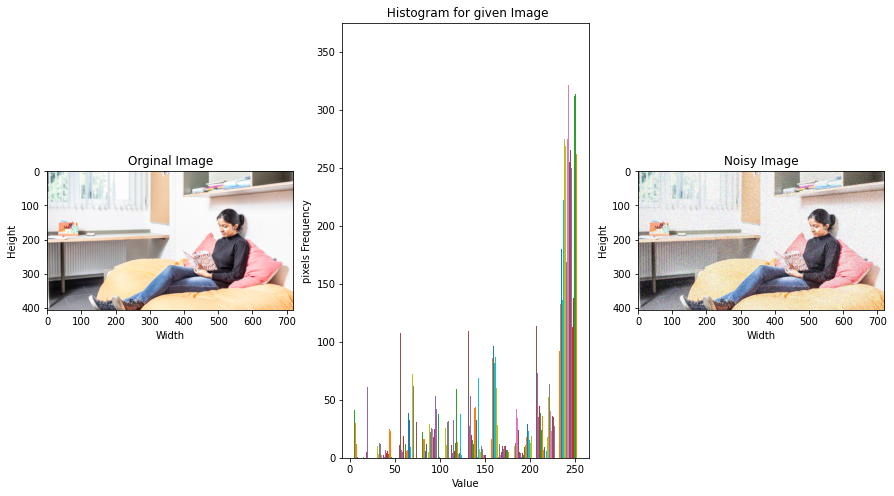

In [10]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,8))
# to plot the image
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Height')
axes[0].set_title('Orginal Image')
axes[0].imshow(img)

# hist function is used to plot the histogram of an image.
axes[1].set_xlabel("Value")
axes[1].set_ylabel("pixels Frequency")
axes[1].set_title(" Histogram for given Image")
axes[1].hist(img[:,:,0]) # Using the image slicing to convert the 3D image to 2D image for the sake of plotting

# to plot the noisy image
axes[2].set_xlabel('Width')
axes[2].set_ylabel('Height')
axes[2].set_title('Noisy Image')
axes[2].imshow(add_noise_to_image(img))
plt.show()

In [11]:
height,width,channels = img.shape
# A function to create bilateral filter
def bilateralFilter(image,sigma):
  output_image = np.zeros([height,width,channels]) # an empty numpy array to store the image
  # Iterating over each pixel
  for i in range(height):
    for j in range(width):
      ip,w = 0,0
      # Sliding thorough the window size
      for x in range(-5,5):
        for y in range(-5,5):
          q_y = np.max([0, np.min([height - 1, i + x])])
          q_x = np.max([0, np.min([width - 1, j + y])])
          # Computer Gaussian filter weight at this filter pixel
          g = np.exp( -((q_x - j)**2 + (q_y - i)**2) / (2 * sigma**2) )
          # Accumulate filtered output
          ip += g * image[i, j, :]
          # Accumulate filter weight for later normalization, to maintain image brightness
          w += g
      output_image[i, j, :] = ip / (w + np.finfo(np.float32).eps)
  return output_image

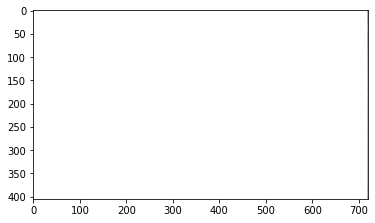

In [12]:
plt.imshow(bilateralFilter(add_noise_to_image(img),20))